In [5]:
import pandas as pd

df = pd.read_csv(r'C:\Users\velut\OneDrive\Documents\New folder\output\all_stocks.csv')
print(df.head())

       Ticker    close                 date    high      low    month    open  \
0        SBIN   602.95  2023-10-03 05:30:00   604.9   589.60  2023-10   596.6   
1  BAJFINANCE  7967.60  2023-10-03 05:30:00  7975.5  7755.00  2023-10  7780.8   
2       TITAN  3196.25  2023-10-03 05:30:00  3212.5  3114.40  2023-10  3148.8   
3         ITC   439.75  2023-10-03 05:30:00   442.9   439.25  2023-10   441.0   
4         TCS  3513.85  2023-10-03 05:30:00  3534.2  3480.10  2023-10  3534.2   

     volume  
0  15322196  
1    944555  
2   1007308  
3   7481883  
4   1948148  


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df = df.sort_values(by=['Ticker', 'date'])

In [8]:
df['prev_close'] = df.groupby('Ticker')['close'].shift(1)
df['daily_return'] = (df['close'] - df['prev_close']) / df['prev_close']
print(df[['Ticker', 'date', 'close', 'prev_close', 'daily_return']].head(10))

       Ticker                date    close  prev_close  daily_return
24   ADANIENT 2023-10-03 05:30:00  2387.25         NaN           NaN
74   ADANIENT 2023-10-04 05:30:00  2464.95     2387.25      0.032548
124  ADANIENT 2023-10-05 05:30:00  2466.35     2464.95      0.000568
174  ADANIENT 2023-10-06 05:30:00  2478.10     2466.35      0.004764
224  ADANIENT 2023-10-09 05:30:00  2442.60     2478.10     -0.014325
274  ADANIENT 2023-10-10 05:30:00  2498.30     2442.60      0.022804
324  ADANIENT 2023-10-11 05:30:00  2488.60     2498.30     -0.003883
374  ADANIENT 2023-10-12 05:30:00  2506.35     2488.60      0.007133
424  ADANIENT 2023-10-13 05:30:00  2454.55     2506.35     -0.020668
474  ADANIENT 2023-10-16 05:30:00  2429.35     2454.55     -0.010267


In [9]:
# Calculate Cumulative Return using transform
df['cumulative_return'] = df.groupby('Ticker')['daily_return'].transform(lambda x: (1 + x).cumprod() - 1)

# Show sample output
print(df[['Ticker', 'date', 'close', 'prev_close', 'daily_return', 'cumulative_return']].head(10))

       Ticker                date    close  prev_close  daily_return  \
24   ADANIENT 2023-10-03 05:30:00  2387.25         NaN           NaN   
74   ADANIENT 2023-10-04 05:30:00  2464.95     2387.25      0.032548   
124  ADANIENT 2023-10-05 05:30:00  2466.35     2464.95      0.000568   
174  ADANIENT 2023-10-06 05:30:00  2478.10     2466.35      0.004764   
224  ADANIENT 2023-10-09 05:30:00  2442.60     2478.10     -0.014325   
274  ADANIENT 2023-10-10 05:30:00  2498.30     2442.60      0.022804   
324  ADANIENT 2023-10-11 05:30:00  2488.60     2498.30     -0.003883   
374  ADANIENT 2023-10-12 05:30:00  2506.35     2488.60      0.007133   
424  ADANIENT 2023-10-13 05:30:00  2454.55     2506.35     -0.020668   
474  ADANIENT 2023-10-16 05:30:00  2429.35     2454.55     -0.010267   

     cumulative_return  
24                 NaN  
74            0.032548  
124           0.033134  
174           0.038056  
224           0.023186  
274           0.046518  
324           0.042455  
374    

In [10]:
latest_return = df.groupby('Ticker').tail(1)[['Ticker', 'cumulative_return']]
top5_stocks = latest_return.sort_values(by='cumulative_return', ascending=False).head(5)
print(top5_stocks)

           Ticker  cumulative_return
14163       TRENT           2.230926
14176         BEL           1.017601
14171         M&M           0.959770
14199  BAJAJ-AUTO           0.890112
14164  BHARTIARTL           0.695990


In [11]:
top5_symbols = top5_stocks['Ticker'].tolist()
df_top5 = df[df['Ticker'].isin(top5_symbols)]

In [12]:
df_top5.to_csv(r'C:\Users\velut\OneDrive\Documents\New folder\output\cumulative_return_top5.csv', index=False)

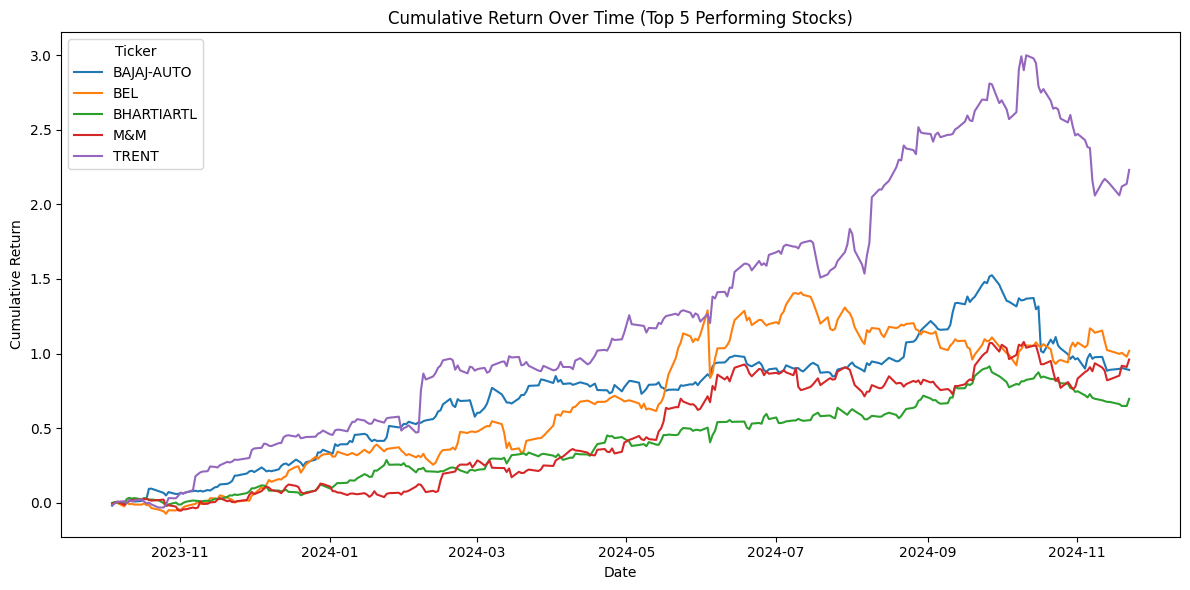

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top5, x='date', y='cumulative_return', hue='Ticker')
plt.title('Cumulative Return Over Time (Top 5 Performing Stocks)')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend(title='Ticker')
plt.tight_layout()
plt.show()